In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.concat([pd.read_csv(f'../data/raw/data_raw_{str(i)}.csv') for i in [1,2]], axis=0)

In [ ]:
print('shape',df.shape)
print('________ info__________')
print(df.info())

shape (45188, 37)
________ info__________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45188 entries, 0 to 20187
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        45188 non-null  int64  
 1   age                            45188 non-null  int64  
 2   gender                         45188 non-null  object 
 3   state                          45188 non-null  object 
 4   city                           44770 non-null  object 
 5   country                        45188 non-null  object 
 6   traffic_source                 45188 non-null  object 
 7   order_date                     45188 non-null  object 
 8   order_id                       45188 non-null  int64  
 9   num_of_item                    45188 non-null  int64  
 10  repurchase                     45188 non-null  int64  
 11  product_id                     45188 non-null  int64  
 12  item

In [19]:
for i in range(df.shape[1]):
    print(df.isnull().sum().index[i], str(df.isnull().sum()[i]))

user_id 0
age 0
gender 0
state 0
city 418
country 0
traffic_source 0
order_date 0
order_id 0
num_of_item 0
repurchase 0
product_id 0
item_sale_price 0
inventory_item_id 0
product_category 0
product_name 2
product_brand 34
product_department 0
product_dc_id 0
product_retail_price 0
dc_name 0
events_7_days_add 0
events_7_days_organic 0
events_7_days_social_network 0
events_7_days_all 0
events_14_days_add 0
events_14_days_organic 0
events_14_days_social_network 0
events_14_days_all 0
events_30_days_add 0
days_between_orders 40197
cancelled_orders 0
returned_orders 0
num_past_purchase 0
order_hour 0
order_day 0
order_month 0


In [46]:
df.loc[df['city'].isnull(),'city'] = 'N/A' # 418
df.loc[df['product_name'].isnull(),'product_name'] = 'N/A' # 2
df.loc[df['product_brand'].isnull(),'product_brand'] = 'N/A' # 34
df.loc[df['days_between_orders'].isnull(),'days_between_orders'] = -1 # 40197 if null means that this is the first purchase
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'repurchase distribution')

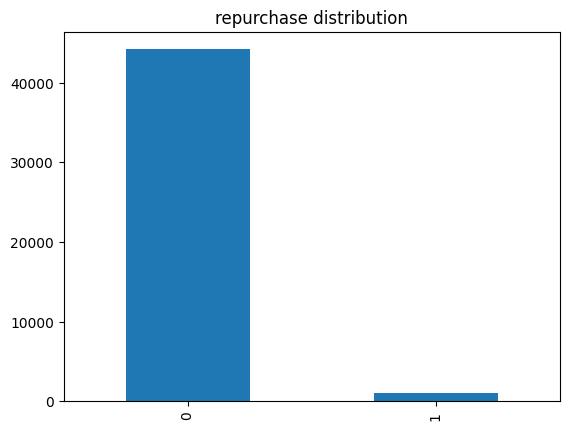

In [52]:
df['repurchase'].value_counts().plot(kind='bar') # unbalanced data
plt.title('repurchase distribution') 

In [53]:
cat_columns = [ 'gender', 'state', 'city', 'country','traffic_source','product_category', 'product_name', 'product_brand',
               'product_department', 'dc_name']
num_columns = ['age','num_of_item','item_sale_price', 'product_retail_price','events_7_days_add', 'events_7_days_organic',
               'events_7_days_social_network', 'events_7_days_all','events_14_days_add', 'events_14_days_organic',
               'events_14_days_social_network', 'events_14_days_all','events_30_days_add', 'days_between_orders',
               'cancelled_orders','returned_orders', 'num_past_purchase','order_hour', 'order_day','order_month']
target = ['repurchase']

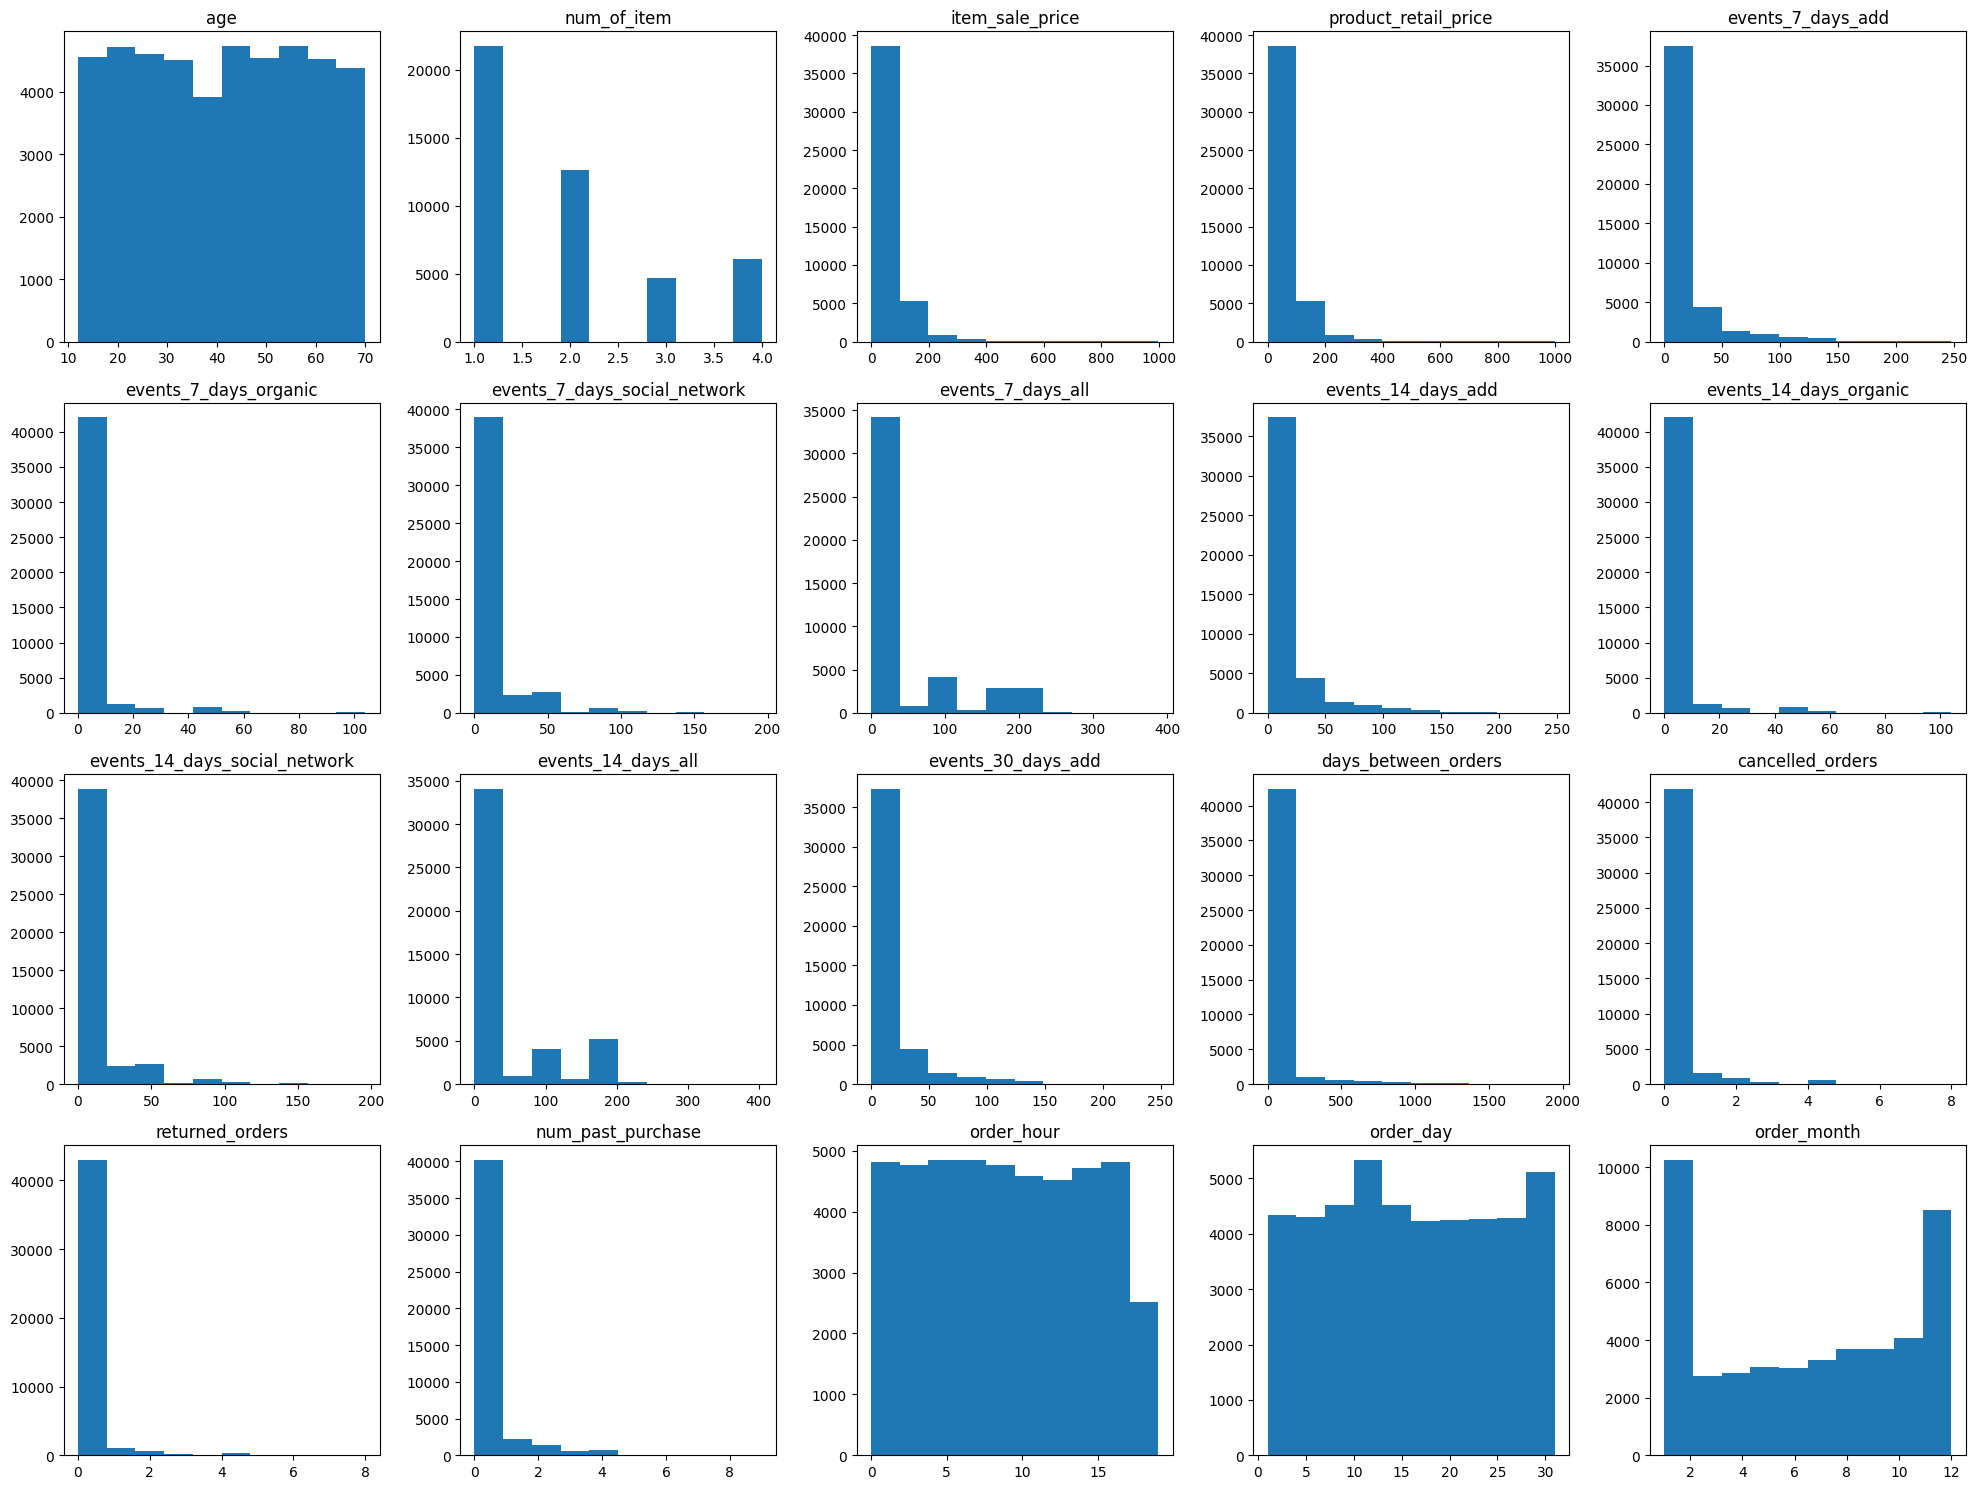

In [62]:
# numeric variables distribution
fig,axes=plt.subplots(nrows=4,ncols=5, figsize=(20, 15))
x = []
for i in range(4):
    x = x+ [i]*5
y=[i for i in range(5)]*4
for i in range(len(num_columns)):
    axes[x[i],y[i]].hist(df[num_columns[i]])
    axes[x[i],y[i]].set_title(num_columns[i])

fig.tight_layout()
plt.show()

In [63]:
len(cat_columns)

10

In [69]:
# categorical variables distribution
for var in cat_columns:
    print(var)
    temp = df[var].value_counts(dropna=False).reset_index()
    temp['perc'] = temp[var]/df.shape[0]
    print(temp)
    print('___'*10)

gender
  index  gender      perc
0     F   22732  0.503054
1     M   22456  0.496946
______________________________
state
          index  state      perc
0     Guangdong   2526  0.055900
1       England   1821  0.040298
2    California   1577  0.034899
3         Texas   1104  0.024431
4      Shanghai   1057  0.023391
..          ...    ...       ...
215   Kagoshima      1  0.000022
216   Yamaguchi      1  0.000022
217     Vermont      1  0.000022
218       Kochi      1  0.000022
219       Ceuta      1  0.000022

[220 rows x 3 columns]
______________________________
city
            index  city      perc
0        Shanghai  1174  0.025980
1         Beijing   964  0.021333
2           Seoul   663  0.014672
3        Shenzhen   568  0.012570
4             N/A   418  0.009250
...           ...   ...       ...
5486       Molong     1  0.000022
5487        Ceres     1  0.000022
5488     Freiberg     1  0.000022
5489        Yeoju     1  0.000022
5490  Mill Valley     1  0.000022

[5491 rows x 

In [67]:
df[var].value_counts(dropna=False).reset_index()

,index,gender
0,F,22732
1,M,22456


In [99]:
# categorical encoging
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X = df[num_columns+cat_columns]
y = df[target].squeeze()

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# transformations 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_encoder = TargetEncoder()

# Fit numeric pipeline
X_train_numeric = numeric_transformer.fit_transform(X_train[num_columns])
X_test_numeric = numeric_transformer.transform(X_test[num_columns])

# Fit categorical encoder using y
X_train_cat = cat_encoder.fit_transform(X_train[cat_columns], y_train)
X_test_cat = cat_encoder.transform(X_test[cat_columns])

# processed_data
X_train_processed = np.concatenate([X_train_numeric, X_train_cat], axis=1)
X_test_processed = np.concatenate([X_test_numeric, X_test_cat], axis=1)

In [ ]:
# save preprocessed data
pd.DataFrame(np.concatenate([X_train_processed, y_train], axis=1), columns=[num_columns+cat_columns+['repurchase']]).to_csv('../data/preprocessed/X_train.csv')
pd.DataFrame(np.concatenate([X_test_processed, y_test], axis=1), columns=[num_columns+cat_columns+['repurchase']]).to_csv('../data/preprocessed/X_test.csv')